In [1]:
import uproot
from glob import glob
from coffea.nanoevents import NanoEventsFactory
import awkward as ak
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import mplhep
mplhep.style.use(mplhep.style.CMS)


#SWAN 
base_directory = "/eos/user/d/dgrove/datasets/"

#files = sorted(glob(f"{base_directory}TChiWZ/*.root"))
files = sorted(glob(f"{base_directory}TSlepSlep/*.root"))


file = uproot.open(files[0])
print("file info:")
dict(file)
events = NanoEventsFactory.from_root(files[0]).events()

file info:


/eos/user/d/dgrove/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(
/eos/user/d/dgrove/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(


In [2]:
events.GenPart.fields

['eta',
 'mass',
 'phi',
 'pt',
 'genPartIdxMother',
 'pdgId',
 'status',
 'statusFlags',
 'genPartIdxMotherG',
 'distinctParentIdxG',
 'childrenIdxG',
 'distinctChildrenIdxG',
 'distinctChildrenDeepIdxG']

For reference, from the pdg id [table](https://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf): 

$\tilde{e}^-_{L}$ = 1000011

$\tilde{µ}^-_L$ = 1000013

$\tilde{χ}^0_1$ = 1000022

$\tilde{χ}^0_2$ = 1000023

$\tilde{χ}^+_1$ = 1000024

$\tilde{e}^-_{R}$ = 2000011

$\tilde{µ}^-_R$ = 2000013


In [3]:
#Access the GenParts collection
genparts = events.GenPart

In [4]:
len(genparts[0])

64

In [5]:
genparts.distinctChildren

<GenParticleArray [[[GenParticle, GenParticle, ... []]] type='1274945 * var * va...'>

In [6]:
# Filter for particles with pdgId 1000023
selected_particles = genparts[genparts.pdgId == 1000023]
print(selected_particles)

# Further filter to select particles with genPartIdxMother == 0 (i.e., first particles)
first_particles = selected_particles[selected_particles.genPartIdxMother == 0]

# Explore children of the first `1000023` particle
if len(first_particles) > 0:
    first_1000023_particle = first_particles[0]  # Select the first particle with pdgId 1000023
    
    # Access children
    children = first_1000023_particle.children

    # Print information about children particles
    print("Children of the first 1000023 particle:")
    print(ak.to_list(children.pdgId))
    print(ak.to_list(children.pt))
    print(ak.to_list(children.eta))
    print(ak.to_list(children.phi))

    # Optional: use distinctChildren to get distinct descendants
    distinct_children = first_1000023_particle.distinctChildren
    print("\nDistinct children of the first 1000023 particle:")
    print(ak.to_list(distinct_children.pdgId))

    # Optional: explore deeper with distinctChildrenDeep
    # Note: distinctChildrenDeep may have issues, use with caution
    distinct_children_deep = first_1000023_particle.distinctChildrenDeep
    print("\nDeep distinct children of the first 1000023 particle:")
    print(ak.to_list(distinct_children_deep.pdgId))

else:
    print("No 1000023 particles found in this event.")


[[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []]
Children of the first 1000023 particle:
[]
[]
[]
[]

Distinct children of the first 1000023 particle:
[]


/eos/user/d/dgrove/.local/lib/python3.9/site-packages/coffea/nanoevents/methods/nanoaod.py:108: UserWarning: distinctChildrenDeep may not give correct answers for all generators!
  warnings.warn(



Deep distinct children of the first 1000023 particle:
[]


In [7]:
# Access the GenPart collection for the first event
genparts = events.GenPart[0]

# Find the first particle with pdgId 1000023
first_1000023 = genparts[genparts.pdgId == 1000023][0]

# Recursive function to follow children until a final child (status == 1)
def follow_children(particle, children_list):
    # Add the current particle to the list
    children_list.append({
        'pdgId': particle.pdgId,
        'pt': particle.pt,
        'eta': particle.eta,
        'phi': particle.phi,
        'status': particle.status
    })
    
    # If the particle's status is 1, we've reached the final child
    if particle.status == 1:
        return children_list
    
    # If the particle has children, follow the first child
    if len(particle.children) > 0:
        return follow_children(particle.children[0], children_list)
    else:
        return children_list

# Initialize a list to store the descendants
descendant_list = []

# Start the recursive function from the first 1000023 particle
descendant_list = follow_children(first_1000023, descendant_list)

# Print out the list of descendants
print("Descendants of the first 1000023 particle:")
for child in descendant_list:
    print(f"pdgId: {child['pdgId']}, pt: {child['pt']}, eta: {child['eta']}, phi: {child['phi']}, status: {child['status']}")


ValueError: in IndexedArray64 attempting to get 0, index out of range

(https://github.com/scikit-hep/awkward-1.0/blob/1.10.3/src/libawkward/array/IndexedArray.cpp#L1269)

In [ ]:
def follow_children(particle, children_list, previous_pdgId=None):
    # Add the current particle to the list only if it's not the same as the previous pdgId
    if particle.pdgId != previous_pdgId:
        children_list.append({
            'pdgId': particle.pdgId,
            'pt': particle.pt,
            'eta': particle.eta,
            'phi': particle.phi,
            'status': particle.status
        })
    
    # If the particle's status is 1, we've reached the final child
    if particle.status == 1:
        return children_list
    
    # If the particle has children, follow the first child
    if len(particle.children) > 0:
        return follow_children(particle.children[0], children_list, particle.pdgId)
    else:
        return children_list

# Initialize a list to store the descendants
descendant_list = []

# Start the recursive function from the first 1000023 particle
descendant_list = follow_children(first_1000023, descendant_list)

# Print out the list of descendants
print("Distinct descendants of the first 1000023 particle:")
for child in descendant_list:
    print(f"pdgId: {child['pdgId']}, pt: {child['pt']}, eta: {child['eta']}, phi: {child['phi']}, status: {child['status']}")


In [ ]:
def follow_distinct_children(particle, children_list, previous_pdgId=None):
    # Add the current particle to the list only if it's not the same as the previous pdgId
    if particle.pdgId != previous_pdgId:
        children_list.append({
            'pdgId': particle.pdgId,
            'pt': particle.pt,
            'eta': particle.eta,
            'phi': particle.phi,
            'status': particle.status
        })
    
    # If the particle's status is 1, we've reached the final child
    if particle.status == 1:
        return children_list
    
    # If the particle has distinct children, follow the first distinct child
    if len(particle.distinctChildren) > 0:
        return follow_distinct_children(particle.distinctChildren[0], children_list, particle.pdgId)
    else:
        return children_list

# Initialize a list to store the descendants
distinct_descendant_list = []

# Start the recursive function from the first 1000023 particle
distinct_descendant_list = follow_distinct_children(first_1000023, distinct_descendant_list)

# Print out the list of distinct descendants
print("Distinct descendants of the first 1000023 particle:")
for child in distinct_descendant_list:
    print(f"pdgId: {child['pdgId']}, pt: {child['pt']}, eta: {child['eta']}, phi: {child['phi']}, status: {child['status']}")


In [ ]:
# Check if distinct children exist for the first particle
print("Distinct children of the first 1000023 particle:")
print(ak.to_list(first_1000023.distinctChildren.pdgId))

# Recursive function to follow distinct children until a final child (status == 1)
def follow_distinct_children(particle, children_list, previous_pdgId=None):
    # Add the current particle to the list only if it's not the same as the previous pdgId
    if particle.pdgId != previous_pdgId:
        children_list.append({
            'pdgId': particle.pdgId,
            'pt': particle.pt,
            'eta': particle.eta,
            'phi': particle.phi,
            'status': particle.status
        })
    
    # If the particle's status is 1, we've reached the final child
    if particle.status == 1:
        return children_list
    
    # Print the distinct children for debugging
    if len(particle.distinctChildren) > 0:
        print("Following distinct children:")
        print(ak.to_list(particle.distinctChildren.pdgId))
    
    # If the particle has distinct children, follow the first distinct child
    if len(particle.distinctChildren) > 0:
        return follow_distinct_children(particle.distinctChildren[0], children_list, particle.pdgId)
    else:
        return children_list

# Initialize a list to store the descendants
distinct_descendant_list = []

# Start the recursive function from the first 1000023 particle
distinct_descendant_list = follow_distinct_children(first_1000023, distinct_descendant_list)

# Print out the list of distinct descendants
print("Distinct descendants of the first 1000023 particle:")
for child in distinct_descendant_list:
    print(f"pdgId: {child['pdgId']}, pt: {child['pt']}, eta: {child['eta']}, phi: {child['phi']}, status: {child['status']}")


In [ ]:
# Access children of the first `1000023` particle
if len(first_particles) > 0:
    first_1000023_particle = first_particles[0]  # Select the first particle with pdgId 1000023
    
    # Access children
    children = first_1000023_particle.children

    # Print information about children particles
    print("Children of the first 1000023 particle:")
    print(ak.to_list(children.pdgId))
    print(ak.to_list(children.pt))
    print(ak.to_list(children.eta))
    print(ak.to_list(children.phi))

    # Optional: use distinctChildren to get distinct descendants
    distinct_children = first_1000023_particle.distinctChildren
    print("\nDistinct children of the first 1000023 particle:")
    print(ak.to_list(distinct_children.pdgId))

else:
    print("No 1000023 particles found in this event.")


[3, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, ... 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2]
[True, False, True, True, False, True, ... False, False, True, False, True, True]
[[472, 377, 28.8], [445, 276], [88.9, 85.5, ... 78.1, 48.5], [101, 80.4], [97.3, 47]]
[472, 445, 88.9, 407, 119, 162, 202, 298, ... 49, 49, 59.7, 114, 78.1, 101, 97.3]
[377, 276, 85.5, 59.7, 115, 134, 54.4, ... 5.14, 23.5, 51.7, 78.4, 48.5, 80.4, 47]


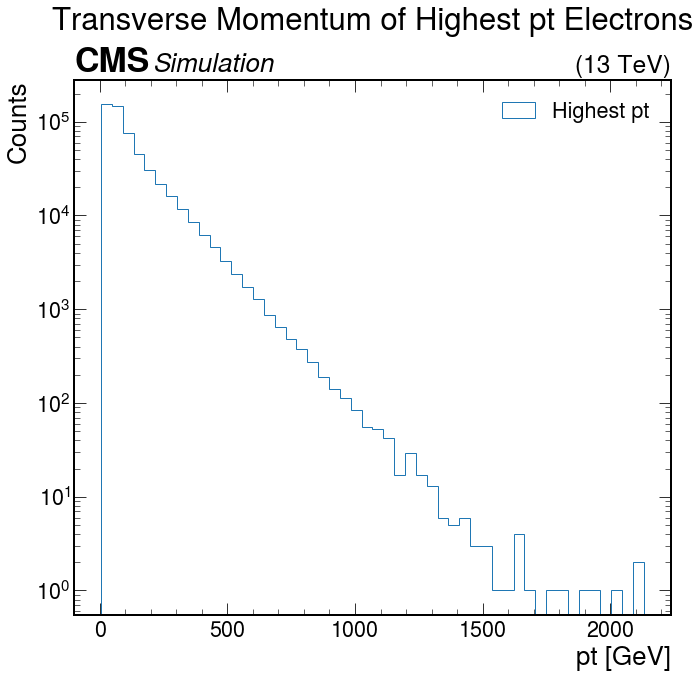

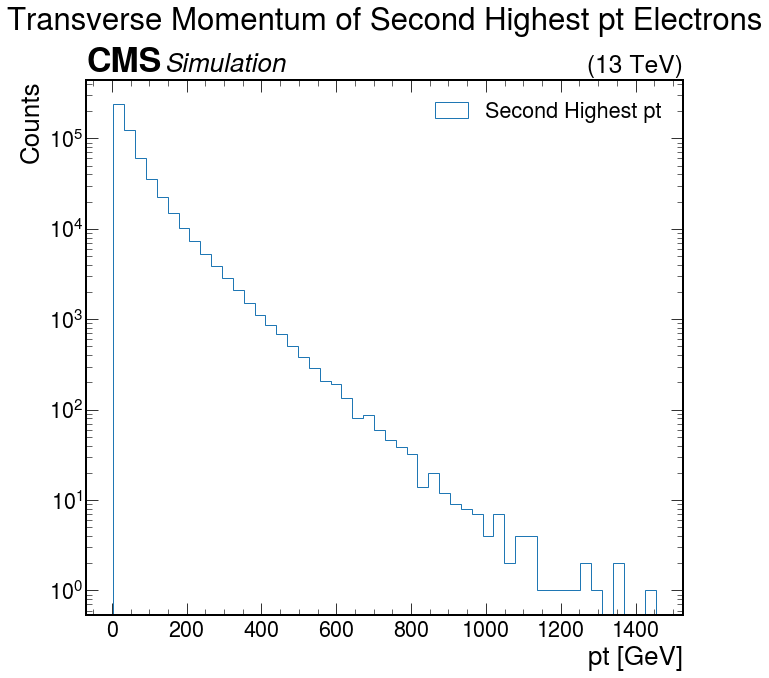

In [8]:
electrons = events.Electron
dielectron_events = electrons[ak.num(electrons)>=2]

#gtoe_2e_mc = ak.num(mcevents.Electron[ak.num(mcevents.Electron)>=2], axis=0)
print(ak.num(electrons))
print(ak.num(electrons)>=2)
dielectron_events

# Sort the electrons by pt in each event
sorted_dielectron_events = dielectron_events[ak.argsort(dielectron_events.pt, axis=1, ascending=False)]
print(sorted_dielectron_events.pt)

# Select the highest pt electrons
highest_pt_electrons = sorted_dielectron_events[:, 0]  # First electron in each event
print(highest_pt_electrons.pt)

# Select the second-highest pt electrons
second_highest_pt_electrons = sorted_dielectron_events[:, 1]  # Second electron in each event
print(second_highest_pt_electrons.pt)

# Plot the highest pt histogram
plt.figure()
plt.hist(ak.to_numpy(highest_pt_electrons.pt), bins=50, histtype='step', label="Highest pt")
plt.xlabel("pt [GeV]")
plt.ylabel("Counts")
plt.yscale('log')  # Set the y-axis to log scale
plt.title("Transverse Momentum of Highest pt Electrons", pad=50)  # Adjust title position with pad
mplhep.cms.label(loc=0)  # Move CMS label to a different position
plt.tight_layout()  # Ensure the layout adjusts automatically
plt.legend()
plt.show()

# Plot the second-highest pt histogram
plt.figure()
plt.hist(ak.to_numpy(second_highest_pt_electrons.pt), bins=50, histtype='step', label="Second Highest pt")
plt.xlabel("pt [GeV]")
plt.ylabel("Counts")
plt.yscale('log')  # Set the y-axis to log scale
plt.title("Transverse Momentum of Second Highest pt Electrons", pad=50)  # Adjust title position
mplhep.cms.label(loc=0)  # Move CMS label to a different position
plt.tight_layout()  # Ensure the layout adjusts automatically
plt.legend()
plt.show()